# RBM-BB 


# RBM-BG (todo)

Bernoulli - Gaussian {-1,1}

\begin{align}
q_{v} (s_i) &= \frac{1}{2} (\delta_{s_i,-1} + \delta_{s_i,1}) \\
q_{h} (\tau_i) &= \frac{1}{\sqrt{2\pi \sigma_{h}^{2}}} \exp \left( - \frac{\tau_{a}^{2}}{2\sigma_{h}^2} \right)
\end{align}

\begin{align}
p(\tau | s) \propto \prod_{a} \exp \left( -\frac{\tau_{a}^2}{2\sigma_{h}^2} + \tau_a \sum_{i} w_{ia} s_i \right)
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [2]:
data_dir = '../../../paperstudy/RBM/datas/'

In [3]:
sys.path.append('../')
import RBM as rbm

## Load data

In [4]:
mnist_train_data = data_dir + "mnist_train.csv"
mnist_test_data = data_dir + "mnist_test.csv"

training_data_file = open(mnist_train_data, 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

test_data_file = open(mnist_test_data, 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [5]:
# number of data
print('number of training data', len(training_data_list))
print('number of test data', len(test_data_list))

number of training data 60000
number of test data 10000


## Preprocessing

In [6]:
n_data_train = 1000
n_data_val = 500
n_data_test = 500

n_x = 784 # input vector size

x_train = np.zeros((n_data_train, n_x))
for i, data in enumerate(training_data_list[:n_data_train]):
    data = data.split(',')
    x_train[i] = np.asfarray(data[1:])/255.
    
x_val = np.zeros((n_data_val, n_x))
for i, data in enumerate(training_data_list[n_data_train:n_data_train+n_data_val]):
    data = data.split(',')
    x_val[i] = np.asfarray(data[1:])/255.
    
x_test = np.zeros((n_data_test, n_x))
for i, data in enumerate(test_data_list[:n_data_test]):
    data = data.split(',')
    x_test[i] = np.asfarray(data[1:])/255.

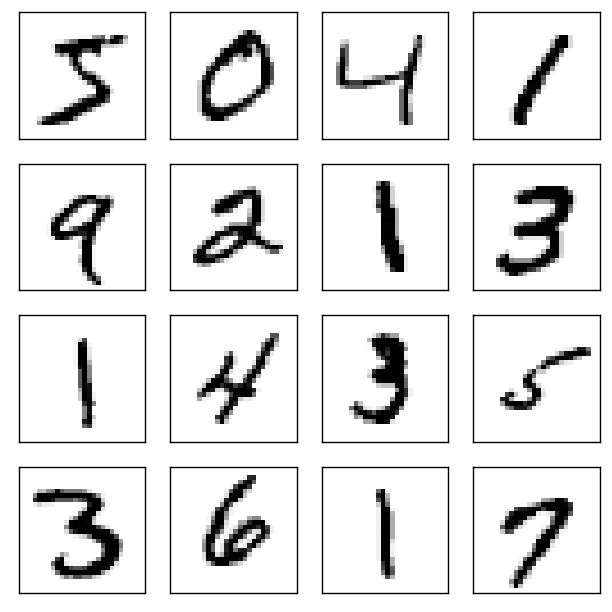

In [7]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

## Define RBM

In [10]:
model = rbm.RBM(n_x,10)

In [11]:
model.fit(x_train,0.1,50)

0 0.4820426225392116
1 0.47265348688495024
2 0.4648601895660225
3 0.4560473194179631
4 0.44886478640475796
5 0.4418303326232455
6 0.43573150309143266
7 0.42880730841356146
8 0.4212856697580993
9 0.41437179420787895
10 0.4085452085736256
11 0.4013355447080793
12 0.395217417457179
13 0.3906833038117209
14 0.384630067517203
15 0.3794480747200841
16 0.37438408912584636
17 0.36925600789335356
18 0.3631683778413325
19 0.35921431121468206
20 0.35498925119067226
21 0.35007727139875544
22 0.34554545367166484
23 0.3412794022510965
24 0.3375131807625011
25 0.3334780767208844
26 0.33010642806142065
27 0.32541045467206486
28 0.32238976139475395
29 0.31861461133472996
30 0.3139791321430533
31 0.30913723038234897
32 0.305069243187471
33 0.29911565175089655
34 0.2937349794819888
35 0.28716474138675085
36 0.2807402315828292
37 0.274449805412361
38 0.26669791465605835
39 0.26072190425189695
40 0.254451035904558
41 0.24876921317546621
42 0.24374743446398164
43 0.23845253650479806
44 0.23394213734513417
4

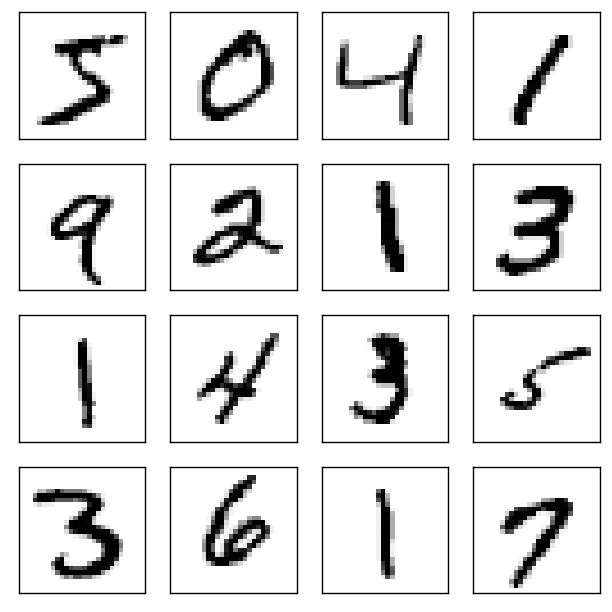

In [12]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

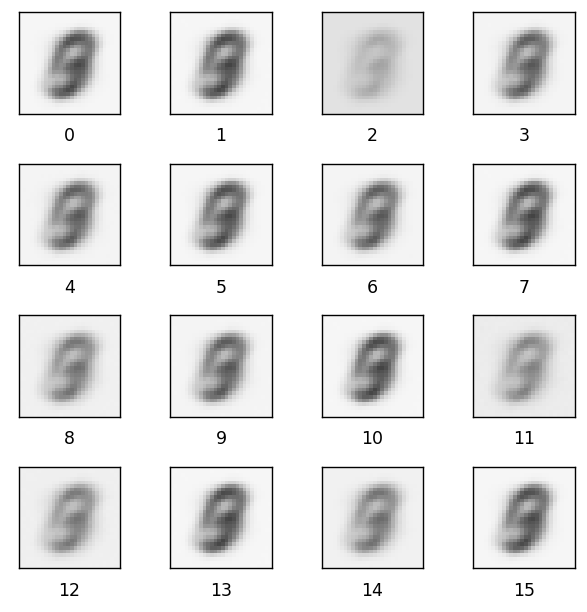

In [13]:
pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [14]:
model.w.T[0].shape

(784,)

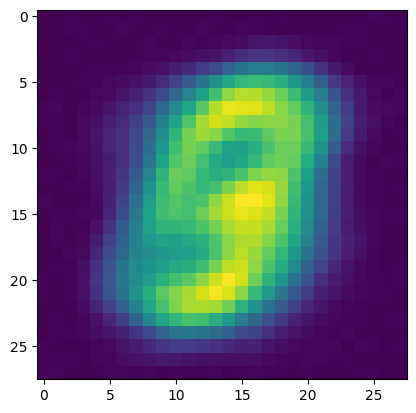

In [15]:
plt.imshow((hid[6]@model.w.T + model.a).reshape(28,28))

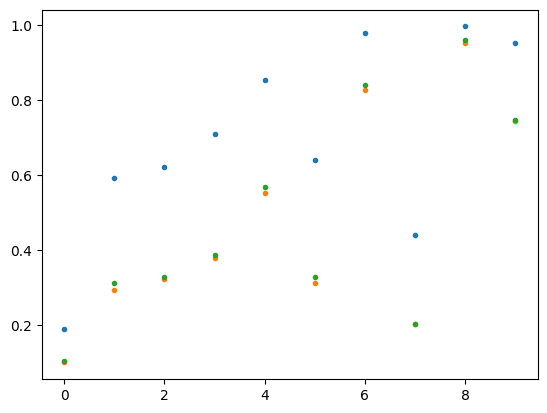

In [16]:
x = np.arange(10)
# plt.hist(hid[8])
plt.plot(x,hid[6],'.')
plt.plot(x,hid[8],'.')
plt.plot(x,hid[14],'.')

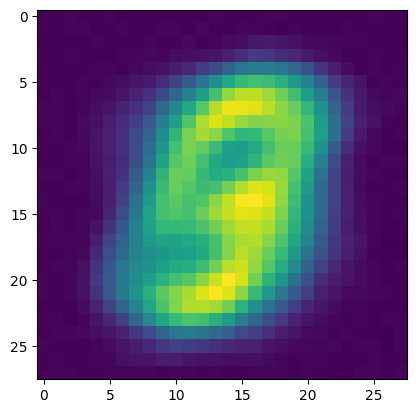

In [17]:
plt.imshow((hid[5]@model.w.T + model.a).reshape(28,28))

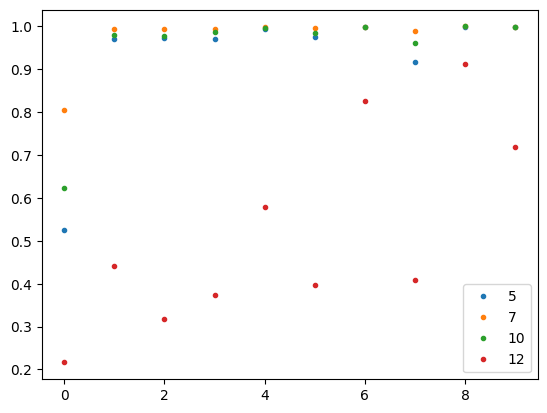

In [18]:
x = np.arange(10)
plt.plot(x,hid[5],'.',label='5')
plt.plot(x,hid[7],'.',label='7')
plt.plot(x,hid[10],'.',label='10')
plt.plot(x,hid[12],'.',label='12')
plt.legend()

In [19]:
model.w.shape

(784, 10)

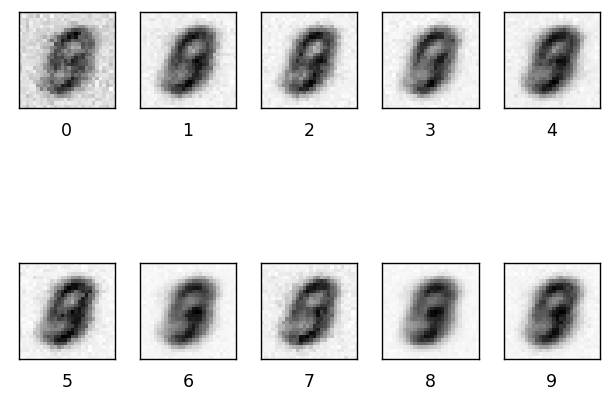

In [20]:
# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [21]:
np.log(784)

6.664409020350408

In [22]:
hid[0]

array([0.47933857, 0.93959498, 0.9287913 , 0.94728058, 0.98340915,
       0.9356885 , 0.99736994, 0.88394561, 0.99942378, 0.9931577 ])

In [23]:
model.w

array([[-0.04431804, -0.10496978, -0.09904016, ..., -0.0873855 ,
        -0.19262478, -0.14814132],
       [-0.04495034, -0.08013121, -0.10531083, ..., -0.07984712,
        -0.21708216, -0.14326621],
       [-0.03508285, -0.09371523, -0.09116462, ..., -0.06896068,
        -0.19698171, -0.16378273],
       ...,
       [-0.02525731, -0.08169937, -0.08734285, ..., -0.08266418,
        -0.21215848, -0.16420226],
       [-0.04894742, -0.09690573, -0.09798404, ..., -0.07164758,
        -0.22522344, -0.16119793],
       [-0.03168326, -0.09341554, -0.07952516, ..., -0.06390641,
        -0.20659699, -0.15423225]])

# Feature retrieving

0 0.48074475839355335
1 0.4727494202582996
2 0.4648419972891116
3 0.4567019962887114
4 0.4493126905664227


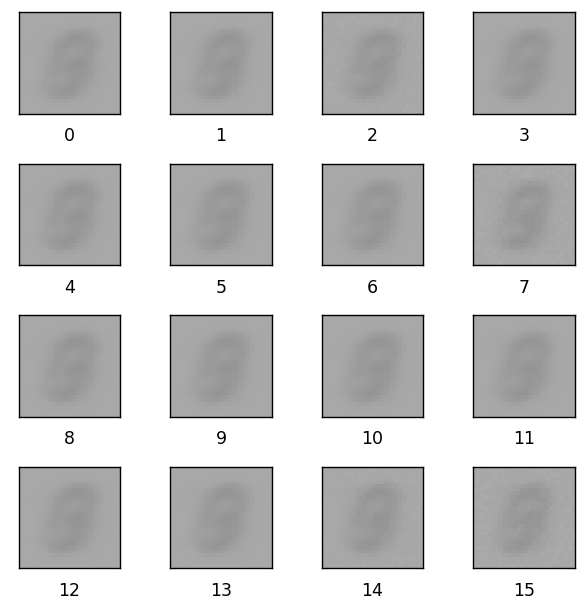

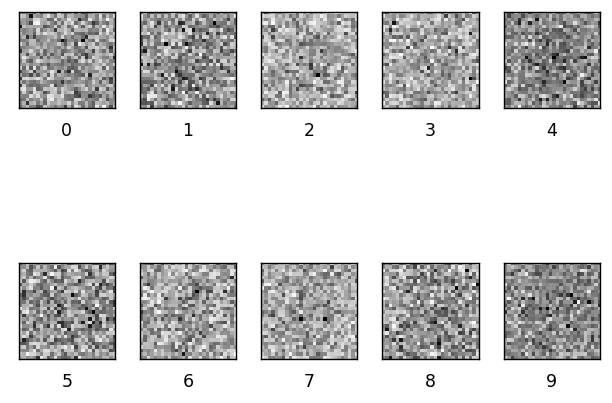

In [25]:
# Not trained

model = rbm.RBM(n_x,10)
model.fit(x_train,0.1,5)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

0 0.4818115701182436
1 0.4730506507504963
2 0.4648548524311686
3 0.45677119896978413
4 0.4492523514307683
5 0.44241544666886384
6 0.43456136003420975
7 0.42802182421988383
8 0.4210342391858706
9 0.4147042972090797
10 0.40773799068647076
11 0.4009442031714647
12 0.3948826835636215
13 0.3902084088537376
14 0.3854043272210844
15 0.37904188724509424
16 0.37358829080651873
17 0.3692251905664225
18 0.3640090341038376
19 0.35928678520427787
20 0.3547856697580994
21 0.35022128400379765
22 0.3460427525912325
23 0.342728286804918
24 0.33747578080251694
25 0.33360394706902374
26 0.3299723094139617
27 0.32584428320347747
28 0.3224811629553782
29 0.3183205887256863
30 0.3145313980494158
31 0.3103648014107604
32 0.3054533518309285
33 0.30097762153881163
34 0.29433276859763513
35 0.2874288270210045
36 0.28026700229111245
37 0.27350763354361346
38 0.2668253056124411
39 0.25984606891776313
40 0.2537898864447739
41 0.2485670773211246
42 0.24321739744917575
43 0.2380747153763467
44 0.23413930621268117
45

352 0.13326156011424178
353 0.1332431327432935
354 0.13248635003020823
355 0.13280015555241706
356 0.13281466135473796
357 0.1328899464687836
358 0.1328274714787876
359 0.1325014560726251
360 0.13238798068246901
361 0.1328166171370509
362 0.13282280461204088
363 0.13244428820547827
364 0.1325646363447339
365 0.1320446483495359
366 0.13252932221908367
367 0.13293583482412577
368 0.1320188880454142
369 0.13225457732112453
370 0.13189029160683888
371 0.13216725739315338
372 0.13220159612864754
373 0.13182299969007208
374 0.1322039970890317
375 0.13209085183092834
376 0.13148272357962792
377 0.13124922017826732
378 0.13160559272728697
379 0.13184269756922382
380 0.13159119696898364
381 0.13175348188294922
382 0.13118845587254516
383 0.13143839584853553
384 0.13157845187094444
385 0.13177610593256914
386 0.13096217536034022
387 0.1314335188977552
388 0.13108748548438984
389 0.131169493287511
390 0.13139307772128464
391 0.13123215335153668
392 0.1312968592338897
393 0.1308565481094398
394 0.

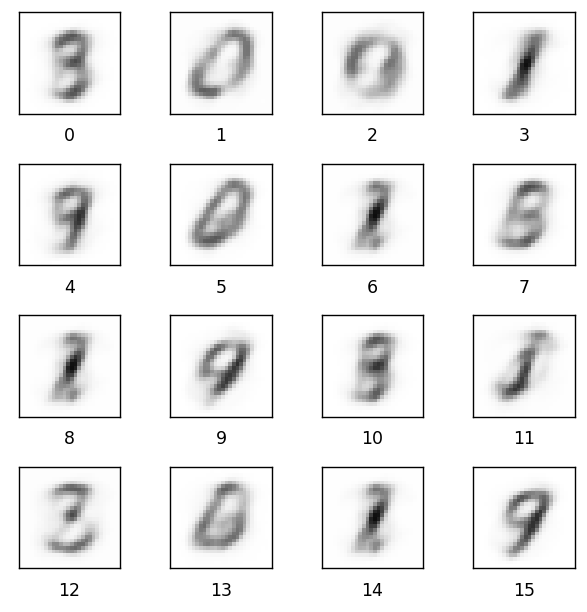

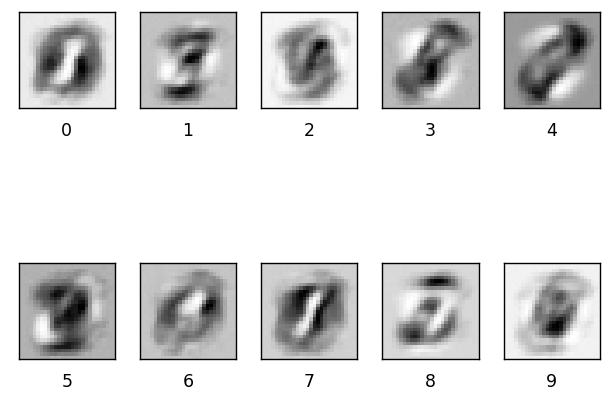

In [28]:
# Mid trained

model = rbm.RBM(n_x,10)
model.fit(x_train,0.1,500)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# Not all patterns are learned

In [29]:
# Well trained

model = RBM(n_x,10)
model.fit(x_train,0.1,3000)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

NameError: name 'RBM' is not defined